In [ ]:
# Text pre-processing
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# K-means clustering
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

sentences = ["In the past John liked only sport but now he likes sport and politics",
             "Sam only liked politics but now he is fan of both music and politics",
             "Sara likes both books and politics but in the past she only read books",
             "Robert loved both books and nature but now he only reads books",
             "Linda liked books and sport but she only likes sport now",
             "Alison used to loved nature but currently she likes both nature and sport"]

corpus = []

for sentence in sentences:
    # Converting to lower case
    sentence = sentence.lower()
    
    # Tokenization
    words = word_tokenize(sentence)
    
    # Stemming
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    
    sentence = ' '.join(words)
    
    corpus.append(sentence)
    
print(corpus)  

['past john like sport like sport polit', 'sam like polit fan music polit', 'sara like book polit past read book', 'robert love book natur read book', 'linda like book sport like sport', 'alison use love natur current like natur sport']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


A list of features:
['alison' 'book' 'like' 'love' 'natur' 'past' 'polit' 'read' 'sport']

Tf-idf-weighted document-term matrix:


,alison,book,like,love,natur,past,polit,read,sport
0,0.000000,0.000000,0.504883,0.000000,0.000000,0.404050,0.341127,0.000000,0.682253
1,0.000000,0.000000,0.347018,0.000000,0.000000,0.000000,0.937858,0.000000,0.000000
2,0.000000,0.691983,0.256042,0.000000,0.000000,0.409812,0.345992,0.409812,0.000000
3,0.000000,0.698055,0.000000,0.413408,0.413408,0.000000,0.000000,0.413408,0.000000
4,0.000000,0.372923,0.551943,0.000000,0.000000,0.000000,0.000000,0.000000,0.745847
5,0.442639,0.000000,0.226776,0.362970,0.725940,0.000000,0.000000,0.000000,0.306444


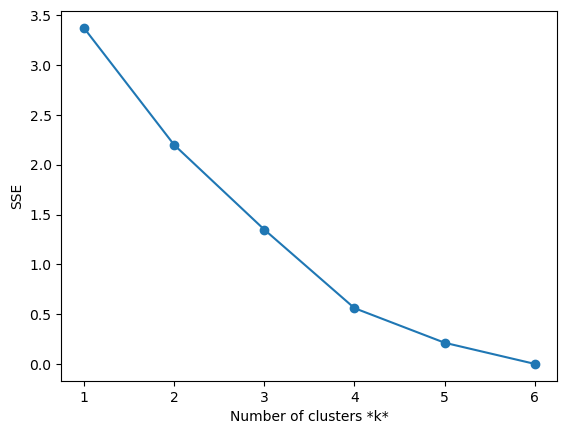

Elbow:  4


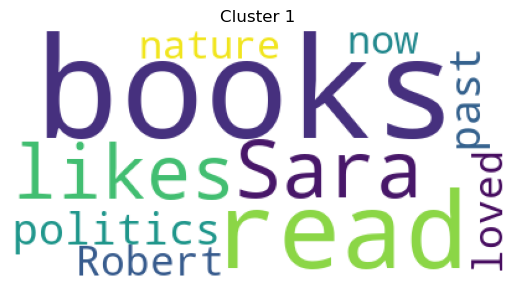

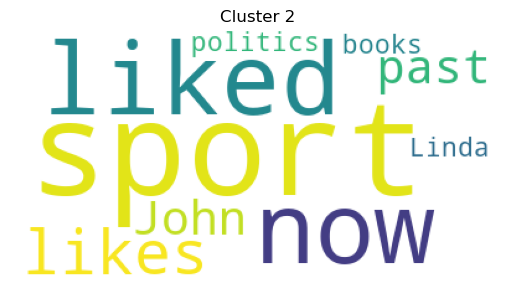

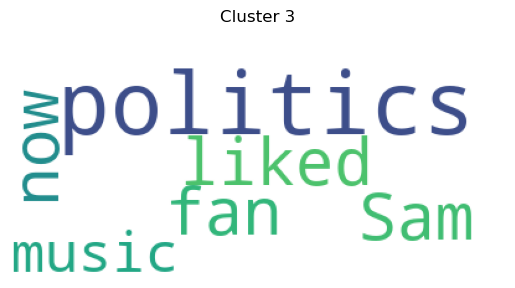

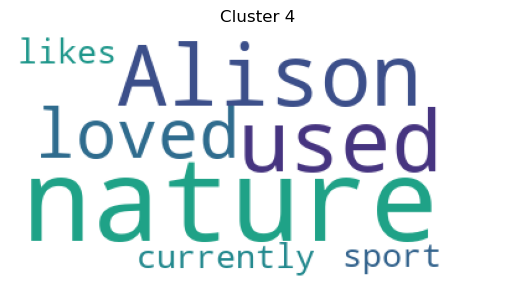

In [8]:
# Question 4

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(norm='l2', max_features=9)
tfidf = v.fit_transform(corpus)

print("A list of features:")
print("===================")
print(v.get_feature_names_out())
print()
print("Tf-idf-weighted document-term matrix:")
print("=====================================")
dp = pd.DataFrame(tfidf.toarray(), columns=v.get_feature_names_out())
display(dp)


# Find an appropriate K value using the elbow method
k_values = range(1, len(sentences)+1)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(tfidf)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia_values, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE');
plt.show()

elbow = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing').elbow
print('Elbow: ', elbow)

# Apply appropriate k-value
kmeans = KMeans(n_clusters=elbow, init='k-means++', random_state=42)
kmeans.fit(tfidf)

# Question 5

# Visualize clusters
from wordcloud import WordCloud

cluster_labels = kmeans.labels_

for cluster in range(elbow):
    cluster_sentences = []
    for i, label in enumerate(cluster_labels):
        if label == cluster:
            cluster_sentences.append(sentences[i])
            
    cluster_text = ' '.join(cluster_sentences)
    
    word_cloud = WordCloud(background_color="white").generate(cluster_text)
    
    plt.imshow(word_cloud)
    plt.title(f"Cluster {cluster + 1}")
    plt.axis('off')
    plt.show()

A list of features:
['alison' 'book' 'like' 'love' 'natur' 'past' 'polit' 'read' 'robert'
 'sam' 'sara' 'sport']

Tf-weighted document-term matrix:


,alison,book,like,love,natur,past,polit,read,robert,sam,sara,sport
0,0.000000,0.000000,0.333333,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00,0.000000,0.333333
1,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.25,0.000000,0.000000
2,0.000000,0.285714,0.142857,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.00,0.142857,0.000000
3,0.000000,0.333333,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.166667,0.00,0.000000,0.000000
4,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.400000
5,0.166667,0.000000,0.166667,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.166667


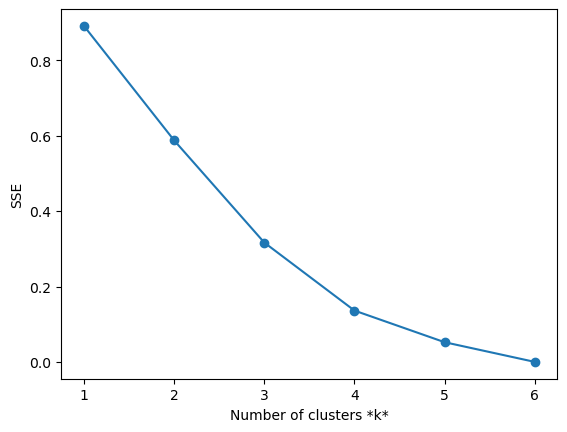

Elbow:  4


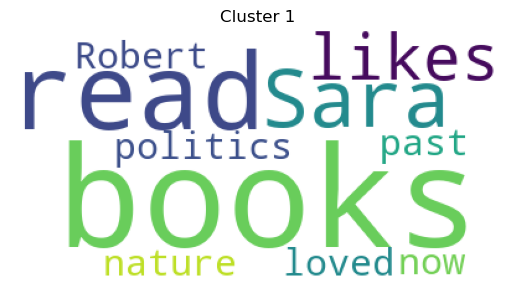

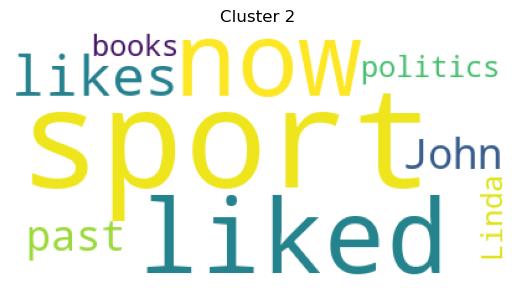

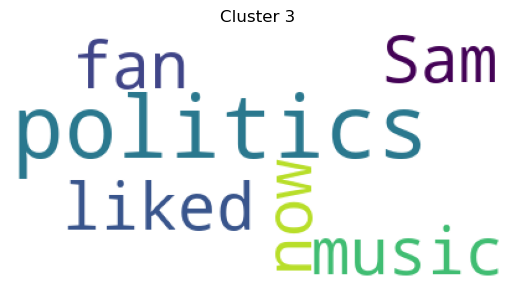

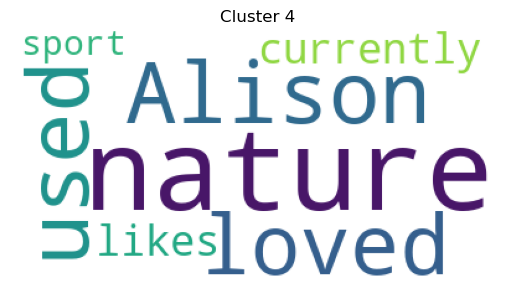

In [9]:
# TF
v = TfidfVectorizer(use_idf=False, norm="l1", max_features=12)
tf = v.fit_transform(corpus)

print("A list of features:")
print("===================")
print(v.get_feature_names_out())
print()
print("Tf-weighted document-term matrix:")
print("=====================================")
dp = pd.DataFrame(tf.toarray(), columns=v.get_feature_names_out())
display(dp)

# Find an appropriate K value using the elbow method
k_values = range(1, len(sentences)+1)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(tf)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia_values, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE');
plt.show()

elbow = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing').elbow
print('Elbow: ', elbow)

# Apply appropriate k-value
kmeans = KMeans(n_clusters=elbow, init='k-means++', random_state=42)
kmeans.fit(tf)

# Visualize clusters
from wordcloud import WordCloud

cluster_labels = kmeans.labels_

for cluster in range(elbow):
    cluster_sentences = []
    for i, label in enumerate(cluster_labels):
        if label == cluster:
            cluster_sentences.append(sentences[i])
            
    cluster_text = ' '.join(cluster_sentences)
    
    word_cloud = WordCloud(background_color="white").generate(cluster_text)
    
    plt.imshow(word_cloud)
    plt.title(f"Cluster {cluster + 1}")
    plt.axis('off')
    plt.show()

A list of features:
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

BOW document-term matrix:


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0,0,0,0,1,2,0,0,0,0,1,1,0,0,0,0,2,0
1,0,0,0,1,0,1,0,0,1,0,0,2,0,0,1,0,0,0
2,0,2,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0
3,0,2,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0
5,1,0,1,0,0,1,0,1,0,2,0,0,0,0,0,0,1,1


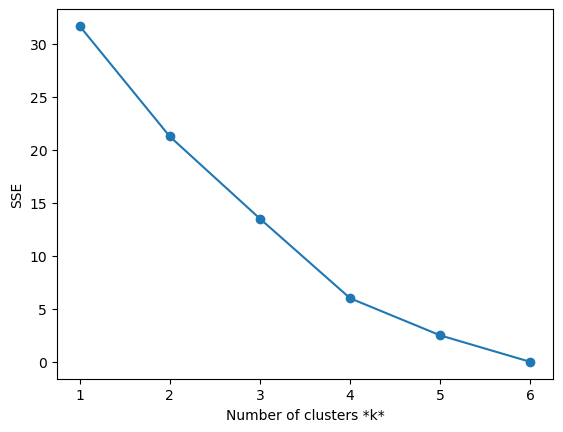

Elbow:  4


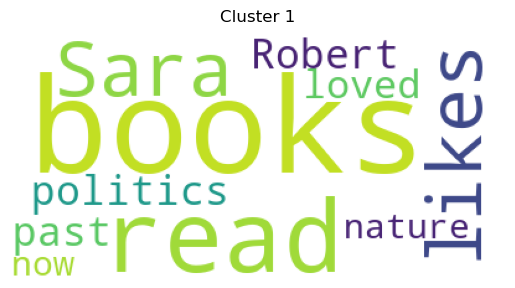

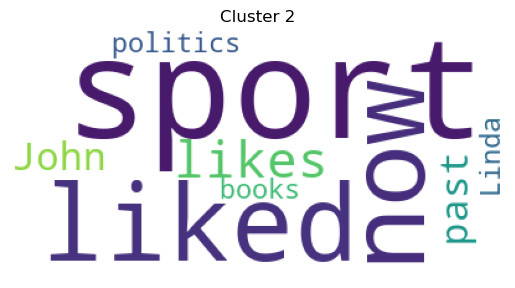

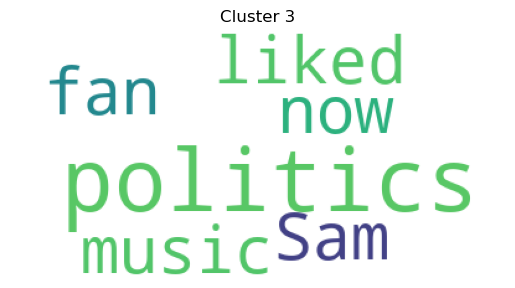

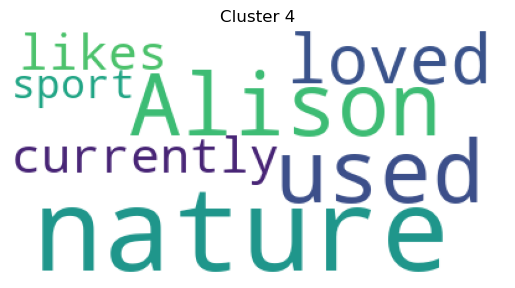

In [10]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
bow = v.fit_transform(corpus)

print("A list of features:")
print("===================")
print(v.get_feature_names_out())
print()
print("BOW document-term matrix:")
print("=====================================")
dp = pd.DataFrame(bow.toarray(), columns=v.get_feature_names_out())
display(dp)

# Find an appropriate K value using the elbow method
k_values = range(1, len(sentences)+1)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(bow)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia_values, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE');
plt.show()

elbow = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing').elbow
print('Elbow: ', elbow)

# Apply appropriate k-value
kmeans = KMeans(n_clusters=elbow, init='k-means++', random_state=42)
kmeans.fit(bow)

# Visualize clusters
from wordcloud import WordCloud

cluster_labels = kmeans.labels_

for cluster in range(elbow):
    cluster_sentences = []
    for i, label in enumerate(cluster_labels):
        if label == cluster:
            cluster_sentences.append(sentences[i])
            
    cluster_text = ' '.join(cluster_sentences)
    
    word_cloud = WordCloud(background_color="white").generate(cluster_text)
    
    plt.imshow(word_cloud)
    plt.title(f"Cluster {cluster + 1}")
    plt.axis('off')
    plt.show()

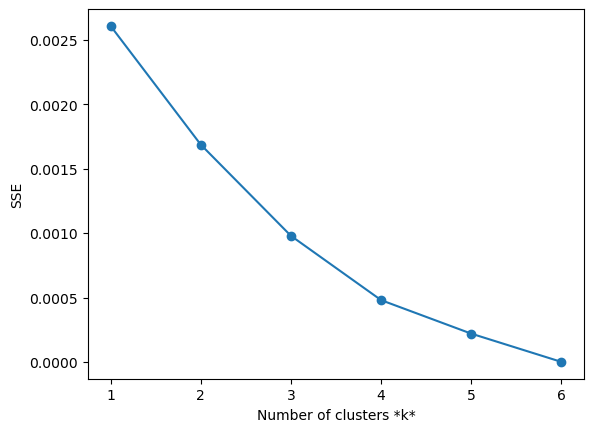

Elbow:  3


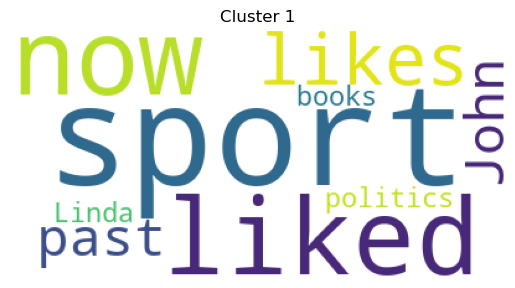

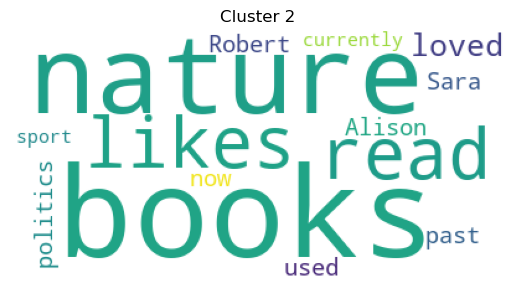

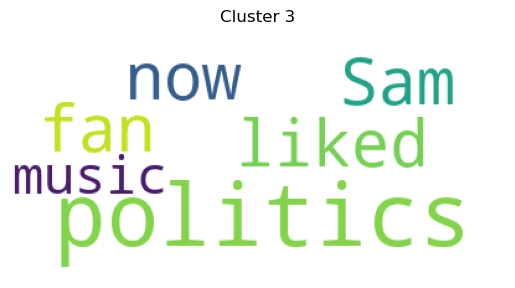

In [11]:
# Word2Vec
from gensim.models import Word2Vec
import gensim

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model on the tokenized sentences
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

sentence_vectors = []
for sentence in corpus:
    vector = np.mean([model.wv[word] for word in sentence.split(' ') if word in model.wv], axis=0)
    sentence_vectors.append(vector)

# Find an appropriate K value using the elbow method
k_values = range(1, len(sentences)+1)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(sentence_vectors)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia_values, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE');
plt.show()

elbow = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing').elbow
print('Elbow: ', elbow)

# Apply appropriate k-value
kmeans = KMeans(n_clusters=elbow, init='k-means++', random_state=42)
kmeans.fit(sentence_vectors)

# Visualize clusters
from wordcloud import WordCloud

cluster_labels = kmeans.labels_

for cluster in range(elbow):
    cluster_sentences = []
    for i, label in enumerate(cluster_labels):
        if label == cluster:
            cluster_sentences.append(sentences[i])

    cluster_text = ' '.join(cluster_sentences)

    word_cloud = WordCloud(background_color="white").generate(cluster_text)
    
    plt.imshow(word_cloud)
    plt.title(f"Cluster {cluster + 1}")
    plt.axis('off')
    plt.show()